In [1]:
import os
import pandas as pd
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
path = "data/chitalnya/"
files = os.listdir(path)

In [5]:
def get_data_structred(data, df_list, filename):
    for i, s in enumerate(data):
        if "rating" not in s:
            s["rating"] = None
        if "meta" not in s:
            s["meta"] = None
        if "url" not in s:
            s["url"] = None
        df_list.append(
                {
                    "idx" : i,
                    "filename":filename,
                    "rating": s["rating"],
                    "text_len": len(s["text"]),
                    "tag": s["tag"],
                    "meta": s["meta"],
                    "url": s["url"],
                }
            )

In [6]:
df_list = []
for file in tqdm(files):
    with open(path + file) as f:
        data = json.load(f)
        get_data_structred(data, df_list, file)
        

100%|██████████| 7937/7937 [00:45<00:00, 173.07it/s]


In [7]:
meta_df = pd.DataFrame(df_list)

df_with_ratings = meta_df[meta_df["rating"].notna()].reset_index(drop=True)
df_with_ratings.rating = df_with_ratings.rating.astype(int)

In [8]:
print(f"Total amount of poems: {len(meta_df)}")
print(f"Poems with rating field: {len(df_with_ratings)}")

Total amount of poems: 714870
Poems with rating field: 127835


In [9]:
def parse_meta(s):
    res = {"reviews": None, "messages": None, "views": None}
    sp = s.split("\n")

    for sl in sp:
        if sl.startswith("Количество отзывов: "):
            res["reviews"] = int(sl.replace("Количество отзывов: ", ""))
        if sl.startswith("Количество сообщений: "):
            res["messages"] = int(sl.replace("Количество сообщений: ", ""))
        if sl.startswith("Количество просмотров: "):
            res["views"] = int(sl.replace("Количество просмотров: ", ""))
    return pd.Series(res)
        

In [10]:
df_with_ratings[["reviews", "messages", "views"]] = df_with_ratings.meta.apply(parse_meta)

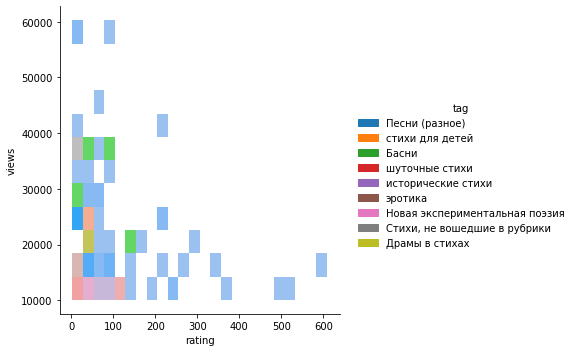

In [15]:
sns.displot(data=df_with_ratings[df_with_ratings["views"]  > 10000], x="rating", y="views", hue="tag")

plt.show()

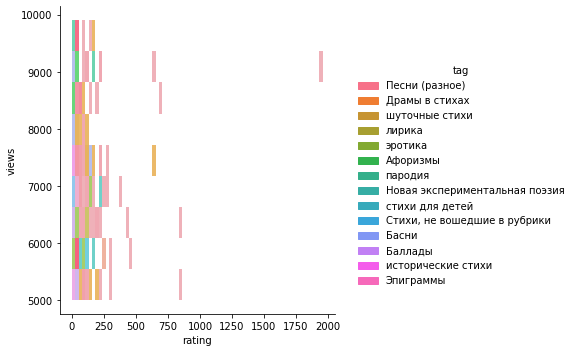

In [21]:
sns.displot(data=df_with_ratings[(df_with_ratings["views"]  > 5000) & (df_with_ratings["views"]  < 10000)], x="rating", y="views", hue="tag")

plt.show()

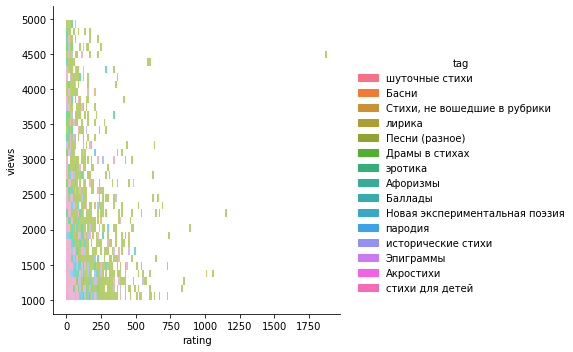

In [17]:
sns.displot(data=df_with_ratings[(df_with_ratings["views"]  > 1000) & (df_with_ratings["views"]  < 5000)], x="rating", y="views", hue="tag")

plt.show()

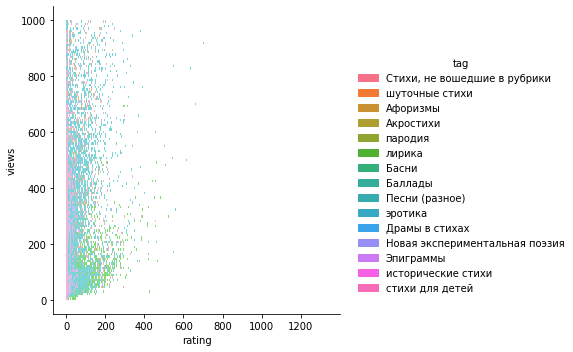

In [22]:
sns.displot(data=df_with_ratings[(df_with_ratings["views"]  > 0) & (df_with_ratings["views"]  < 1000)], x="rating", y="views", hue="tag")

plt.show()

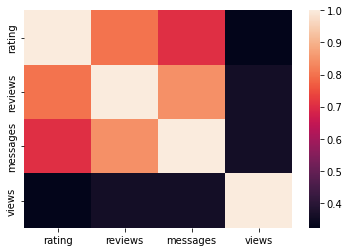

In [26]:
sns.heatmap(df_with_ratings[["rating", "reviews", "messages", "views"]].corr("spearman"))
plt.show()

In [27]:
df_with_ratings[df_with_ratings["rating"] > df_with_ratings["views"]]

,idx,filename,rating,text_len,tag,meta,url,reviews,messages,views
86,58,"Стихи, не вошедшие в рубрики_division=31_page6...",159,996,"Стихи, не вошедшие в рубрики",Рейтинг работы: 159\nКоличество отзывов: 3\nКо...,https://www.chitalnya.ru/work/3196432/,3,3,84
178,33,лирика_division=20_page436.json,62,368,лирика,Рейтинг работы: 62\nКоличество отзывов: 6\nКол...,https://www.chitalnya.ru/work/2985628/,6,7,60
179,36,лирика_division=20_page436.json,110,582,лирика,Рейтинг работы: 110\nКоличество отзывов: 11\nК...,https://www.chitalnya.ru/work/2985503/,11,12,76
182,43,лирика_division=20_page436.json,537,902,лирика,Рейтинг работы: 537\nКоличество отзывов: 38\nК...,https://www.chitalnya.ru/work/2985339/,38,45,528
184,46,лирика_division=20_page436.json,67,553,лирика,Рейтинг работы: 67\nКоличество отзывов: 11\nКо...,https://www.chitalnya.ru/work/2985230/,11,13,48
...,...,...,...,...,...,...,...,...,...,...
127679,42,лирика_division=20_page561.json,51,894,лирика,Рейтинг работы: 51\nКоличество отзывов: 3\nКол...,https://www.chitalnya.ru/work/2828943/,3,3,35
127788,1,лирика_division=20_page617.json,86,860,лирика,Рейтинг работы: 86\nКоличество отзывов: 8\nКол...,https://www.chitalnya.ru/work/2749833/,8,8,48
127817,59,лирика_division=20_page617.json,85,350,лирика,Рейтинг работы: 85\nКоличество отзывов: 10\nКо...,https://www.chitalnya.ru/work/2748839/,10,10,57
127820,62,лирика_division=20_page617.json,52,401,лирика,Рейтинг работы: 52\nКоличество отзывов: 9\nКол...,https://www.chitalnya.ru/work/2750132/,9,10,42


In [28]:
df_with_ratings[df_with_ratings["reviews"]>100]

,idx,filename,rating,text_len,tag,meta,url,reviews,messages,views
4954,1,Песни (разное)_channel=audio_division=21_page2...,1145,684,Песни (разное),Рейтинг работы: 1145\nКоличество отзывов: 165\...,https://www.chitalnya.ru/work/1517500/,165,169,2212
8437,93,Песни (разное)_channel=audio_division=21_page4...,893,1826,Песни (разное),Рейтинг работы: 893\nКоличество отзывов: 152\n...,https://www.chitalnya.ru/work/491349/,152,162,2004
20747,80,Песни (разное)_channel=audio_division=21_page2...,702,1873,Песни (разное),Рейтинг работы: 702\nКоличество отзывов: 110\n...,https://www.chitalnya.ru/work/1216525/,110,111,917
41658,89,Песни (разное)_channel=audio_division=21_page2...,636,1037,Песни (разное),Рейтинг работы: 636\nКоличество отзывов: 120\n...,https://www.chitalnya.ru/work/1801806/,120,130,825
58345,72,Песни (разное)_channel=audio_division=21_page2...,725,952,Песни (разное),Рейтинг работы: 725\nКоличество отзывов: 113\n...,https://www.chitalnya.ru/work/1463463/,113,119,830
58353,91,Песни (разное)_channel=audio_division=21_page2...,634,1542,Песни (разное),Рейтинг работы: 634\nКоличество отзывов: 102\n...,https://www.chitalnya.ru/work/1465261/,102,108,1060
69632,93,Песни (разное)_channel=audio_division=21_page4...,1879,3237,Песни (разное),Рейтинг работы: 1879\nКоличество отзывов: 243\...,https://www.chitalnya.ru/work/473801/,243,264,4537
75864,78,Песни (разное)_channel=audio_division=21_page3...,1057,924,Песни (разное),Рейтинг работы: 1057\nКоличество отзывов: 135\...,https://www.chitalnya.ru/work/725639/,135,139,1402
81049,4,лирика_division=20_page247.json,857,946,лирика,Рейтинг работы: 857\nКоличество отзывов: 141\n...,https://www.chitalnya.ru/work/3164803/,141,142,471
87353,87,Песни (разное)_channel=audio_division=21_page4...,733,1141,Песни (разное),Рейтинг работы: 733\nКоличество отзывов: 125\n...,https://www.chitalnya.ru/work/335943/,125,128,1452


In [11]:
df_with_ratings[["rating", "text_len", "views", "reviews", "messages"]].describe(include="all")

,rating,text_len,views,reviews,messages
count,127835.000000,127835.000000,127835.000000,127835.000000,127835.000000
mean,29.767231,779.762499,246.059467,4.414002,4.682614
std,50.031324,1930.529442,798.277279,6.149514,7.068691
min,1.000000,1.000000,2.000000,0.000000,0.000000
25%,4.000000,407.000000,36.000000,1.000000,1.000000
50%,11.000000,622.000000,95.000000,2.000000,2.000000
75%,35.000000,881.000000,265.000000,5.000000,6.000000
max,1959.000000,261860.000000,60256.000000,279.000000,308.000000


In [12]:
set(df_with_ratings["tag"].values)

{'Акростихи',
 'Афоризмы',
 'Баллады',
 'Басни',
 'Драмы в стихах',
 'Новая экспериментальная поэзия',
 'Песни (разное)',
 'Стихи, не вошедшие в рубрики',
 'Эпиграммы',
 'исторические стихи',
 'лирика',
 'пародия',
 'стихи для детей',
 'шуточные стихи',
 'эротика'}

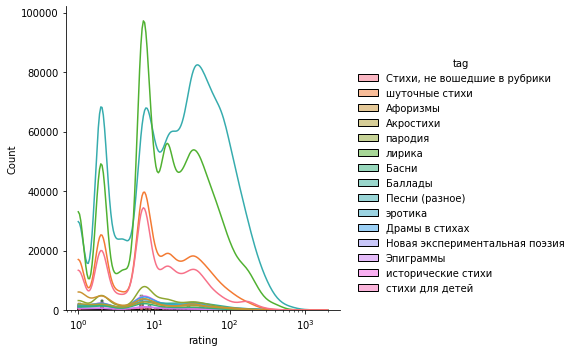

In [51]:
sns.displot(data=df_with_ratings, x="rating", hue="tag", kde=True, log_scale=True)


plt.show()

In [72]:
rating_max = df_with_ratings.rating.max()
rating_min = df_with_ratings.rating.min()
df_with_ratings["scaled_rating"] = df_with_ratings.rating.apply(lambda x: (x - rating_min) / (rating_max - rating_min))

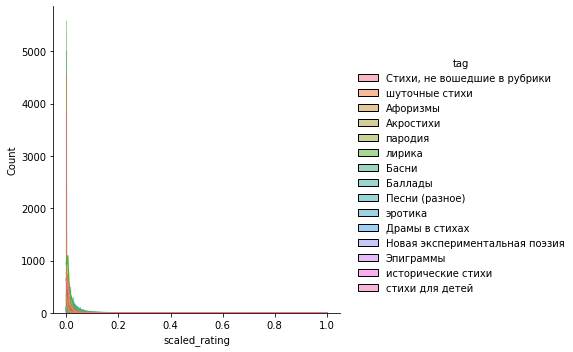

In [12]:
sns.displot(data=df_with_ratings, x="scaled_rating", hue="tag", kde=True)


plt.show()

In [73]:
df_with_ratings[df_with_ratings["scaled_rating"] > 0.7]

,idx,filename,rating,text_len,tag,scaled_rating
69632,93,Песни (разное)_channel=audio_division=21_page4...,1879,3237,Песни (разное),0.959142
107417,54,Песни (разное)_channel=audio_division=21_page4...,1959,661,Песни (разное),1.000000


In [74]:
# Дофига выбросов
df_with_ratings  = df_with_ratings[df_with_ratings["scaled_rating"] <= 0.7].reset_index(drop=True)

In [75]:
rating_max = df_with_ratings.rating.max()
rating_min = df_with_ratings.rating.min()
df_with_ratings.loc[:, "scaled_rating"] = df_with_ratings.rating.apply(lambda x: (x - rating_min) / (rating_max - rating_min))

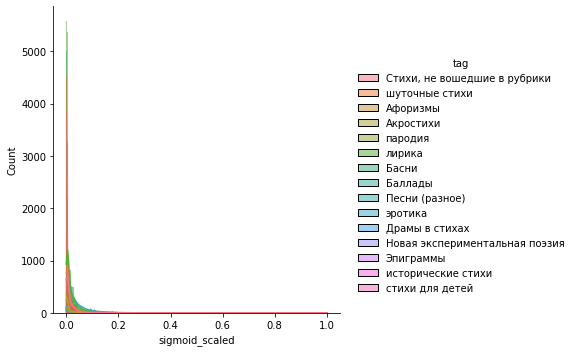

In [16]:
sns.displot(data=df_with_ratings, x="scaled_rating", hue="tag", kde=True)


plt.show()

In [17]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [76]:
df_with_ratings["sigmoid_rating"] = df_with_ratings.rating.apply(lambda x: sigmoid(x))

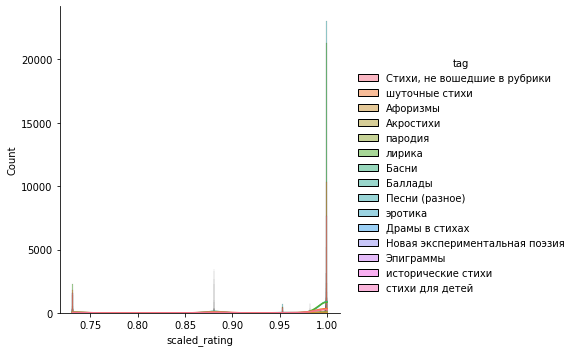

In [19]:
sns.displot(data=df_with_ratings, x="sigmoid_rating", hue="tag", kde=True)


plt.show()

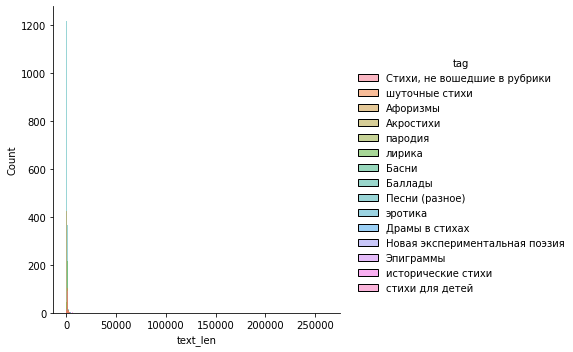

In [20]:
sns.displot(data=df_with_ratings, x="text_len", hue="tag")

plt.show()

In [13]:
outliers = df_with_ratings[df_with_ratings["text_len"] > 5000]


In [14]:
len(outliers)

783

In [48]:
outliers.sort_values(by="text_len", ascending=False)

,idx,filename,rating,text_len,tag,meta,url,reviews,messages,views
80813,61,"Стихи, не вошедшие в рубрики_division=31_page7...",7,261860,"Стихи, не вошедшие в рубрики",Рейтинг работы: 7\nКоличество отзывов: 1\nКоли...,https://www.chitalnya.ru/work/3170058/,1,0,19
7348,87,"Стихи, не вошедшие в рубрики_division=31_page3...",230,213092,"Стихи, не вошедшие в рубрики",Рейтинг работы: 230\nКоличество отзывов: 17\nК...,https://www.chitalnya.ru/work/2671984/,17,31,629
14844,86,пародия_division=24_page50.json,97,163225,пародия,Рейтинг работы: 97\nКоличество отзывов: 14\nКо...,https://www.chitalnya.ru/work/2155159/,14,11,584
35090,45,"Стихи, не вошедшие в рубрики_division=31_page5...",37,142299,"Стихи, не вошедшие в рубрики",Рейтинг работы: 37\nКоличество отзывов: 1\nКол...,https://www.chitalnya.ru/work/1878503/,1,1,293
27776,2,"Стихи, не вошедшие в рубрики_division=31_page5...",44,131997,"Стихи, не вошедшие в рубрики",Рейтинг работы: 44\nКоличество отзывов: 2\nКол...,https://www.chitalnya.ru/work/1879122/,2,2,239
...,...,...,...,...,...,...,...,...,...,...
63817,44,исторические стихи_division=13_page90.json,31,3007,исторические стихи,Рейтинг работы: 31\nКоличество отзывов: 6\nКол...,https://www.chitalnya.ru/work/79204/,6,7,668
68471,16,шуточные стихи_division=36_page48.json,37,3006,шуточные стихи,Рейтинг работы: 37\nКоличество отзывов: 6\nКол...,https://www.chitalnya.ru/work/3027406/,6,6,62
120420,57,лирика_division=20_page842.json,116,3004,лирика,Рейтинг работы: 116\nКоличество отзывов: 16\nК...,https://www.chitalnya.ru/work/2488400/,16,16,85
39849,15,Песни (разное)_channel=audio_division=21_page5...,209,3004,Песни (разное),Рейтинг работы: 209\nКоличество отзывов: 29\nК...,https://www.chitalnya.ru/work/120167/,29,64,18057


In [78]:
for i, ot in outliers.iterrows():
        with open(path + ot["filename"]) as f:
                data = json.load(f)
                print("URL: {}     Rating: {}  Scaled rating: {}     Length: {}".format(data[ot["idx"]]["url"], ot["rating"], ot["scaled_rating"],ot["text_len"]))

URL: https://www.chitalnya.ru/work/2671984/     Rating: 230  Scaled rating: 0.17192192192192193     Length: 213092
URL: https://www.chitalnya.ru/work/2155159/     Rating: 97  Scaled rating: 0.07207207207207207     Length: 163225
URL: https://www.chitalnya.ru/work/456117/     Rating: 7  Scaled rating: 0.0045045045045045045     Length: 103762
URL: https://www.chitalnya.ru/work/1879122/     Rating: 44  Scaled rating: 0.03228228228228228     Length: 131997
URL: https://www.chitalnya.ru/work/1877900/     Rating: 31  Scaled rating: 0.02252252252252252     Length: 125931
URL: https://www.chitalnya.ru/work/1878503/     Rating: 37  Scaled rating: 0.02702702702702703     Length: 142299
URL: https://www.chitalnya.ru/work/1876837/     Rating: 60  Scaled rating: 0.044294294294294295     Length: 128239
URL: https://www.chitalnya.ru/work/568186/     Rating: 7  Scaled rating: 0.0045045045045045045     Length: 103984
URL: https://www.chitalnya.ru/work/3171261/     Rating: 7  Scaled rating: 0.0045045045

In [83]:
df_with_ratings[df_with_ratings["scaled_rating"] > 0.8]

,idx,filename,rating,text_len,tag,scaled_rating,sigmoid_rating
4954,1,Песни (разное)_channel=audio_division=21_page2...,1145,684,Песни (разное),0.858859,1.0
114222,1,лирика_division=20_page451.json,1333,1333,лирика,1.000000,1.0


In [85]:
for i, ot in df_with_ratings[df_with_ratings["scaled_rating"] > 0.8].iterrows():
        with open(path + ot["filename"]) as f:
                data = json.load(f)
                print("URL: {}     Rating: {}  Scaled rating: {}     Length: {}".format(data[ot["idx"]]["url"], ot["rating"], ot["scaled_rating"],ot["text_len"]))
                print(data[ot["idx"]]["meta"])

URL: https://www.chitalnya.ru/work/1517500/     Rating: 1145  Scaled rating: 0.8588588588588588     Length: 684
Рейтинг работы: 1145
Количество отзывов: 165
Количество сообщений: 169
Количество просмотров: 2212
Добавили MP3 в избранное: 16
Добавили в избранное: 12
© 14.12.2015г. Станислав Пенявский
Свидетельство о публикации: izba-2015-1517500

Рубрика произведения: Песни -> Песни (разное)
URL: https://www.chitalnya.ru/work/2966662/     Rating: 1333  Scaled rating: 1.0     Length: 1333
Рейтинг работы: 1333
Количество отзывов: 132
Количество сообщений: 129
Количество просмотров: 643
Добавили MP3 в избранное: 5
Добавили в избранное: 9
© 10.12.2020г. Владимир Филатов
Свидетельство о публикации: izba-2020-2966662

Рубрика произведения: Поэзия -> Мир души
Подрубрика: Стихи про зиму


In [40]:
outliers[0]

array([87, 'Стихи, не вошедшие в рубрики_division=31_page306.json', 230,
       213092, 'Стихи, не вошедшие в рубрики', 1.0, 0.17192192192192193],
      dtype=object)

In [13]:
df_with_ratings = df_with_ratings[df_with_ratings["text_len"] <= 5000]

In [94]:
meta_df[meta_df["tag"] == "Песни (разное)"]

,idx,filename,rating,text_len,tag
4570,0,Песни (разное)_channel=audio_division=21_page4...,44,1145,Песни (разное)
4571,1,Песни (разное)_channel=audio_division=21_page4...,None,1402,Песни (разное)
4572,2,Песни (разное)_channel=audio_division=21_page4...,46,1130,Песни (разное)
4573,3,Песни (разное)_channel=audio_division=21_page4...,None,116,Песни (разное)
4574,4,Песни (разное)_channel=audio_division=21_page4...,23,565,Песни (разное)
...,...,...,...,...,...
714325,95,Песни (разное)_channel=audio_division=21_page4...,7,31,Песни (разное)
714326,96,Песни (разное)_channel=audio_division=21_page4...,39,878,Песни (разное)
714327,97,Песни (разное)_channel=audio_division=21_page4...,38,718,Песни (разное)
714328,98,Песни (разное)_channel=audio_division=21_page4...,152,994,Песни (разное)


__Берем за таргет максмин шкалированное значение рейтинга (Даже если мы до конца не понимаем, как он строится, но похоже, сильно зависит от количества отзывов и сообщений)__

In [29]:
set(meta_df["tag"].values)

{'some34',
 'Акростихи',
 'Афоризмы',
 'Баллады',
 'Басни',
 'Драмы в стихах',
 'Новая экспериментальная поэзия',
 'Песни (разное)',
 'Стихи, не вошедшие в рубрики',
 'Эпиграммы',
 'декадентство',
 'исторические стихи',
 'лирика',
 'манифест',
 'мистика',
 'пародия',
 'пейзажная лирика',
 'сатира',
 'стихи для детей',
 'стихи о войне',
 'частушки',
 'шуточные стихи',
 'эзотерика',
 'эротика',
 'юмор'}

# Let's make a basic

* TF-IDF + linreg
* ruBert + linear head

In [18]:
to_learn = df_with_ratings[df_with_ratings["text_len"] <= 5000]

In [15]:
%load_ext autoreload
%autoreload 2
from utils import preprocess_text_tf_idf

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold 

In [17]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [16]:
from string import punctuation
import re

# tag_mapper = {"новая экспериментальная поэзия":
#                                  "эксперимент",
#               "песни (разное)" : "песни",
#               "Стихи, не вошедшие в рубрики" : "разное",
#               "стихи для детей" : "дети",
#               ""
            
#                                  }

def preprocess_text_tf_idf(text):
    text = text.lower()
    text = re.sub("https?://[^\s]+", "", text)
    text = text.replace("\n", " ")
    for p in punctuation:
        text = text.replace(p, " ")
    text = re.sub(r" {2,}", " ", text)
    return text.strip()

def get_text(row):
    with open(path + row["filename"]) as f:
        data = json.load(f)
        return preprocess_text_tf_idf(data[row["idx"]]["text"])

In [21]:
to_learn["text"] = to_learn.apply(get_text, axis=1)

KeyboardInterrupt: 

In [26]:
to_learn = pd.read_csv("preprocessed_tf_idf.csv")

In [22]:
# to_learn.to_csv("preprocessed_tf_idf.csv", index=None)

In [27]:
rating_max = to_learn.rating.max()
rating_min = to_learn.rating.min()
to_learn.loc[:, "scaled_rating"] = to_learn.rating.apply(lambda x: (x - rating_min) / (rating_max - rating_min) * (5 - 1) + 1)

In [28]:
# Еще порежем рейтинг
to_learn = to_learn[to_learn.scaled_rating <= 2]

In [35]:
to_learn = to_learn.dropna()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(to_learn.text, to_learn.scaled_rating, train_size=0.7, random_state=0XDEAD)

In [37]:
vect = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=1500)
X_train_text = vect.fit_transform(X_train)
X_test_text = vect.transform(X_test)

In [38]:
regr = LinearSVR(random_state=0XDEAD)
kf = KFold(n_splits=5, shuffle=True, random_state=0XDEAD)

In [39]:
%%time
cv_results = cross_val_score(regr, X_train_text, y_train, cv=kf, scoring='neg_mean_squared_error', verbose=10, n_jobs=-2)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................


/home/paperspace/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ............................... score: (test=-0.009) total time=  10.3s


/home/paperspace/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-2)]: Done   2 out of   5 | elapsed:   13.7s remaining:   20.5s


[CV] END ............................... score: (test=-0.009) total time=  12.7s


/home/paperspace/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-2)]: Done   3 out of   5 | elapsed:   15.4s remaining:   10.3s


[CV] END ............................... score: (test=-0.009) total time=  14.3s


/home/paperspace/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/paperspace/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:   16.3s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:   16.3s finished


[CV] END ............................... score: (test=-0.009) total time=  15.1s
[CV] END ............................... score: (test=-0.009) total time=  15.3s
CPU times: user 60.3 ms, sys: 400 ms, total: 460 ms
Wall time: 16.4 s


In [40]:
cv_results, cv_results.mean()

(array([-0.00906856, -0.00883194, -0.0089075 , -0.00943868, -0.00894425]),
 -0.009038183960672474)

In [41]:
%%time
regr.fit(X_train_text, y_train)

CPU times: user 13.7 s, sys: 27.3 ms, total: 13.7 s
Wall time: 13.7 s


/home/paperspace/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=57005)

In [42]:
test_preds = regr.predict(X_test_text)

In [43]:
from sklearn.metrics import mean_absolute_error

In [44]:
y_test

58032     1.061287
32333     1.077630
119540    1.006129
90647     1.175689
44586     1.020429
            ...   
120922    1.034729
27109     1.034729
39444     1.112360
89989     1.002043
111910    1.030644
Name: scaled_rating, Length: 38045, dtype: float64

In [45]:
print(mean_squared_error(y_test, test_preds))
print(mean_absolute_error(y_test, test_preds))

0.008958270883681757
0.04749213608044243


In [46]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test, [y_test.mean()] * len(y_test))

0.0

In [48]:
y_test.mean(), y_test.std()

(1.058086151674318, 0.09492292602917883)

# ruBert

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

/home/paperspace/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def preprocess_text_bert(text):
    text = text.lower()
    text = re.sub("https?://[^\s]+", "", text)
    text = text.replace("\n", " ")
    text = re.sub(r" {2,}", " ", text)
    return text.strip()

def get_text(row):
    with open(path + row["filename"]) as f:
        data = json.load(f)
        return preprocess_text_bert(data[row["idx"]]["text"])

In [4]:
class RatedPoetryDataset(Dataset):

    def __init__(self, df, path, transform=None):
        self.df = df
        self.path = path
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        sample = self.df.loc[idx, "text"]
        if self.transform:
            sample = self.transform(sample)
        return sample

In [59]:
to_learn["text"] = to_learn.apply(get_text, axis=1)

/tmp/ipykernel_89760/660073454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_learn["text"] = to_learn.apply(get_text, axis=1)


In [61]:
to_learn

,idx,filename,rating,text_len,tag,meta,url,reviews,messages,views,text,scaled_rating
0,4,"Стихи, не вошедшие в рубрики_division=31_page4...",2,154,"Стихи, не вошедшие в рубрики",Рейтинг работы: 2\nКоличество отзывов: 1\nКоли...,https://www.chitalnya.ru/work/2217660/,1,1,54,(шутка) представьте! все мужчины разом вдруг в...,1.002043
1,11,"Стихи, не вошедшие в рубрики_division=31_page4...",9,717,"Стихи, не вошедшие в рубрики",Рейтинг работы: 9\nКоличество отзывов: 2\nКоли...,https://www.chitalnya.ru/work/2218519/,2,2,66,всех женщин я спешу поздравить с прекрасным пр...,1.016343
2,14,"Стихи, не вошедшие в рубрики_division=31_page4...",2,783,"Стихи, не вошедшие в рубрики",Рейтинг работы: 2\nКоличество отзывов: 1\nКоли...,https://www.chitalnya.ru/work/2217000/,1,1,62,"вот и пришел любимый всеми праздник, на крылья...",1.002043
3,20,"Стихи, не вошедшие в рубрики_division=31_page4...",16,184,"Стихи, не вошедшие в рубрики",Рейтинг работы: 16\nКоличество отзывов: 3\nКол...,https://www.chitalnya.ru/work/2218270/,3,5,72,позвольте мне поздравить нас с весной! позволь...,1.030644
4,30,"Стихи, не вошедшие в рубрики_division=31_page4...",7,618,"Стихи, не вошедшие в рубрики",Рейтинг работы: 7\nКоличество отзывов: 1\nКоли...,https://www.chitalnya.ru/work/2218410/,1,1,54,"космонав - водолазу ""приём!"" говорит, тот молч...",1.012257
...,...,...,...,...,...,...,...,...,...,...,...,...
127047,83,лирика_division=20_page617.json,76,1500,лирика,Рейтинг работы: 76\nКоличество отзывов: 16\nКо...,https://www.chitalnya.ru/work/2749878/,16,18,103,собор живоначальной троицы. выкса какие вихри ...,1.153218
127048,84,лирика_division=20_page617.json,23,907,лирика,Рейтинг работы: 23\nКоличество отзывов: 4\nКол...,https://www.chitalnya.ru/work/2749259/,4,2,58,анна гетьман (крупенникова) мелодекламация све...,1.044944
127049,86,лирика_division=20_page617.json,100,1204,лирика,Рейтинг работы: 100\nКоличество отзывов: 10\nК...,https://www.chitalnya.ru/work/2750274/,10,12,112,"мне миражи, огромные цветы, набоковского ярког...",1.202247
127050,88,лирика_division=20_page617.json,89,391,лирика,Рейтинг работы: 89\nКоличество отзывов: 12\nКо...,https://www.chitalnya.ru/work/2749257/,12,11,58,снега осели. на тропинках лёд. играет солнце н...,1.179775


/tmp/ipykernel_89760/4143126884.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(to_learn.rating)


<AxesSubplot:xlabel='rating', ylabel='Density'>

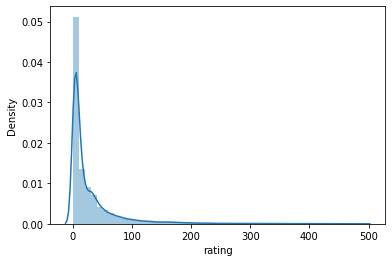

In [53]:
sns.distplot(to_learn.scaled_rating)

In [54]:
to_learn[to_learn.scaled_rating > 2]

,idx,filename,rating,text_len,tag,meta,url,reviews,messages,views,text,scaled_rating


In [6]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/ruBert-base")

model = AutoModelForMaskedLM.from_pretrained("sberbank-ai/ruBert-base")

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
2022-12-25 20:17:59.286262: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Some weights of the model checkpoint at sberbank-ai/ruBert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassific

In [10]:
labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
to_learn['label'] = pd.cut(to_learn['scaled_rating'] * 100, bins=10, labels=labels)

NameError: name 'to_learn' is not defined

In [7]:
from datasets import Dataset

In [12]:
dataset = Dataset.from_csv("we_will_win.csv")

Using custom data configuration default-9049e03411585c23
Found cached dataset csv (/home/paperspace/.cache/huggingface/datasets/csv/default-9049e03411585c23/0.0.0)


<AxesSubplot:>

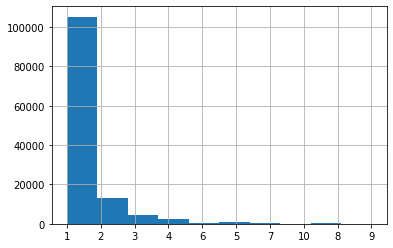

In [75]:
to_learn["label"].hist()

In [76]:
# to_learn[["text", "label"]].to_csv("we_will_win.csv", index=None)

In [13]:
dataset = dataset.train_test_split(test_size=0.4, seed=42)

Loading cached split indices for dataset at /home/paperspace/.cache/huggingface/datasets/csv/default-9049e03411585c23/0.0.0/cache-5d62a2cf1ae6c88d.arrow and /home/paperspace/.cache/huggingface/datasets/csv/default-9049e03411585c23/0.0.0/cache-08ceaee42bffdff5.arrow


In [15]:
def tokenize_function(examples):
    return tokenizer(examples['text'], padding=True, truncation=True, max_length=256, add_special_tokens = True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

100%|██████████| 51/51 [00:15<00:00,  3.19ba/s]


In [16]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 76089
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 50726
    })
})

In [17]:
from transformers import TrainingArguments
import evaluate

metric = evaluate.combine(["accuracy", "f1", "precision", "recall"])

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [18]:
from transformers import AutoModelForSequenceClassification


model = AutoModelForSequenceClassification.from_pretrained("sberbank-ai/ruBert-base", num_labels=10)

Some weights of the model checkpoint at sberbank-ai/ruBert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not in

In [19]:

from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    per_device_train_batch_size=32,
    num_train_epochs=1,
    seed=42,
    learning_rate=3e-4,
    do_eval=True,
)

In [20]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [21]:
trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    compute_metrics=compute_metrics,

)

In [22]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/home/paperspace/.local/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 76089
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2378
  Number of trainable parameters = 178315018
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than

RuntimeError: CUDA out of memory. Tried to allocate 96.00 MiB (GPU 0; 7.93 GiB total capacity; 6.70 GiB already allocated; 76.19 MiB free; 6.76 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

# Let's try to change target